# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
type(pd.read_csv('craftcans.csv'))
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.sort_values(by='Brewery',ascending=False).head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1600,Wynkoop Pumpkin Ale,Wynkoop Brewing Company,"Denver, CO",Pumpkin Ale,12 oz.,5.50%,NaN
1978,B3K Black Lager,Wynkoop Brewing Company,"Denver, CO",Schwarzbier,12 oz.,5.50%,NaN
1308,Patty's Chile Beer,Wynkoop Brewing Company,"Denver, CO",Chile Beer,12 oz.,4.20%,NaN
1336,Colorojo Imperial Red Ale,Wynkoop Brewing Company,"Denver, CO",American Strong Ale,12 oz.,8.20%,NaN
2332,Rail Yard Ale (2009),Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,NaN
1610,Rocky Mountain Oyster Stout,Wynkoop Brewing Company,"Denver, CO",American Stout,12 oz.,7.50%,NaN
2286,Silverback Pale Ale,Wynkoop Brewing Company,"Denver, CO",American Pale Ale (APA),12 oz.,5.50%,40.0
1808,Rail Yard Ale,Wynkoop Brewing Company,"Denver, CO",American Amber / Red Ale,12 oz.,5.20%,NaN
1714,Belgorado,Wynkoop Brewing Company,"Denver, CO",Belgian IPA,12 oz.,6.70%,45.0
1149,Worthy IPA (2013),Worthy Brewing Company,"Bend, OR",American IPA,12 oz.,6.90%,69.0


## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts(ascending= False)

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.80%      66
5.60%      66
5.10%      62
5.30%      60
4.90%      59
6.20%      59
8.00%      57
4.70%      57
5.70%      52
6.80%      52
5.40%      50
7.50%      43
4.20%      38
6.30%      38
4.00%      38
7.20%      37
9.90%      35
5.90%      34
4.60%      32
6.90%      32
8.50%      26
6.70%      25
         ... 
9.50%       9
4.10%       9
7.40%       8
8.30%       8
7.90%       7
3.80%       6
8.80%       6
3.50%       6
7.60%       5
9.70%       5
9.30%       5
9.60%       5
8.10%       4
3.70%       4
8.60%       4
8.40%       3
9.10%       3
9.80%       3
3.20%       3
2.70%       2
8.90%       2
2.80%       1
9.40%       1
12.80%      1
3.40%       1
10.40%      1
10.00%      1
0.10%       1
12.50%      1
12.00%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV

0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
         ...  
2386     5.70%
2387     6.20%
2388     4.90%
2389     9.90%
2390     6.20%
2391     5.80%
2392     5.20%
2393     8.50%
2394     7.00%
2395     5.30%
2396     5.60%
2397     4.90%
2398     5.10%
2399     4.00%
2400     5.50%
2401     5.10%
2402     5.10%
2403     9.70%
2404     5.10%
2405     6.70%
2406     6.20%
2407     8.30%
2408     7.00%
2409     4.90%
2410     9.90%
2411     5.30%
2412     9.90%
2413     8.00%
2414     8.70%
2415     6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
df['ABV']=df.ABV.str.replace('%', '')

In [9]:
df.ABV

0        4.50
1        4.90
2        4.80
3        6.00
4        6.00
5        5.60
6        8.00
7       12.50
8        7.70
9        4.20
10       5.00
11       6.60
12       4.00
13       5.50
14       7.60
15       5.10
16       6.50
17       6.00
18       5.00
19       5.20
20       4.80
21       7.20
22       6.70
23       4.90
24       8.00
25       7.50
26       6.00
27       8.00
28       6.30
29       5.80
        ...  
2386     5.70
2387     6.20
2388     4.90
2389     9.90
2390     6.20
2391     5.80
2392     5.20
2393     8.50
2394     7.00
2395     5.30
2396     5.60
2397     4.90
2398     5.10
2399     4.00
2400     5.50
2401     5.10
2402     5.10
2403     9.70
2404     5.10
2405     6.70
2406     6.20
2407     8.30
2408     7.00
2409     4.90
2410     9.90
2411     5.30
2412     9.90
2413     8.00
2414     8.70
2415     6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df['ABV'] = df.ABV.astype(float)
df['ABV'] 

0        4.5
1        4.9
2        4.8
3        6.0
4        6.0
5        5.6
6        8.0
7       12.5
8        7.7
9        4.2
10       5.0
11       6.6
12       4.0
13       5.5
14       7.6
15       5.1
16       6.5
17       6.0
18       5.0
19       5.2
20       4.8
21       7.2
22       6.7
23       4.9
24       8.0
25       7.5
26       6.0
27       8.0
28       6.3
29       5.8
        ... 
2386     5.7
2387     6.2
2388     4.9
2389     9.9
2390     6.2
2391     5.8
2392     5.2
2393     8.5
2394     7.0
2395     5.3
2396     5.6
2397     4.9
2398     5.1
2399     4.0
2400     5.5
2401     5.1
2402     5.1
2403     9.7
2404     5.1
2405     6.7
2406     6.2
2407     8.3
2408     7.0
2409     4.9
2410     9.9
2411     5.3
2412     9.9
2413     8.0
2414     8.7
2415     6.5
Name: ABV, Length: 2416, dtype: float64

In [11]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [12]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

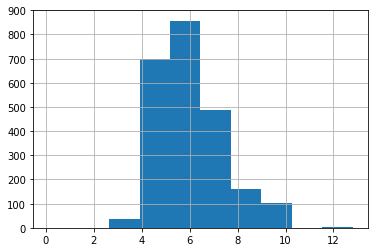

In [31]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [14]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

In [15]:
df[df.ABV.isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
217,U. P. Witbier,Keweenaw Brewing Company,"Houghton, MI",Witbier,12 oz.,NaN,NaN
307,Fat Paczki,Brewery Vivant,"Grand Rapids, MI",Belgian Dark Ale,16 oz.,NaN,NaN
308,Earth-Like Planets,Brewery Vivant,"Grand Rapids, MI",Belgian Pale Ale,16 oz.,NaN,NaN
324,Royal Lager,Weston Brewing Company,"Weston, MO",American Pale Lager,16 oz.,NaN,NaN
344,O’Malley’s Stout,Weston Brewing Company,"Weston, MO",English Stout,12 oz.,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [16]:
df.sort_values(by='Location',ascending=False).head(10)


,Beer,Brewery,Location,Style,Size,ABV,IBUs
836,Adam's Stout,Liquid Hero Brewery,"York, PA",American Stout,12 oz.,5.8,40.0
979,Irregardless IPA,Liquid Hero Brewery,"York, PA",American IPA,12 oz.,6.5,75.0
978,Schweet Ale,Liquid Hero Brewery,"York, PA",Fruit / Vegetable Beer,12 oz.,5.2,20.0
977,American Hero,Liquid Hero Brewery,"York, PA",American Amber / Red Ale,12 oz.,5.7,42.0
278,Nitro Can Coffee Stout,Vault Brewing Company,"Yardley, PA",American Stout,12 oz.,5.2,NaN
1677,Field 41 Pale Ale,Bale Breaker Brewing Company,"Yakima, WA",American Pale Ale (APA),12 oz.,4.4,38.0
1676,Topcutter India Pale Ale,Bale Breaker Brewing Company,"Yakima, WA",American IPA,12 oz.,6.8,70.0
968,Be Hoppy IPA,Wormtown Brewery,"Worcester, MA",American IPA,16 oz.,6.5,69.0
2213,Copper Hook (2011),Redhook Brewery,"Woodinville, WA",American Amber / Red Ale,12 oz.,5.8,27.0
872,Filthy Hoppin' IPA,Dirty Bucket Brewing Company,"Woodinville, WA",American IPA,16 oz.,6.5,72.0


## List all of the beer from Brooklyn, NY

In [17]:
Brooklynbeer = df[df.Location=='Brooklyn, NY']
Brooklynbeer

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [18]:
Brooklynbeer = df[df.Location=='Brooklyn, NY']
Brooklynbeer.Brewery.value_counts(ascending=False).head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [19]:
#df[df.Brewery.str.contains("Sixp.*int", na=False)]

In [20]:
Sixpoint = df[df.Brewery== 'Sixpoint Craft Ales']
Sixpoint.Style.value_counts(ascending=False).head(5)

American IPA                      4
Rye Beer                          2
German Pilsener                   2
Cream Ale                         2
American Double / Imperial IPA    2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [21]:
NYstate = df[df.Location.str.contains(",.*NY", na=False)]
NYstate

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


In [22]:
df.Brewery.isnull().value_counts()


False    2410
True        6
Name: Brewery, dtype: int64

In [23]:
df.dropna(subset=['Brewery'], inplace=True)
df[df.Brewery.isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs


In [24]:
NYstate.Brewery.sort_values()

1703       Blue Point Brewing Company
1913       Blue Point Brewing Company
1935       Blue Point Brewing Company
1937       Blue Point Brewing Company
2015                Bomb Beer Company
2073                Bomb Beer Company
1373                 Brooklyn Brewery
1857                 Brooklyn Brewery
2351                 Brooklyn Brewery
2350                 Brooklyn Brewery
2027                 Brooklyn Brewery
2219                 Brooklyn Brewery
2367          Butternuts Beer and Ale
2366          Butternuts Beer and Ale
2365          Butternuts Beer and Ale
2364          Butternuts Beer and Ale
599                   Chatham Brewing
598                   Chatham Brewing
2113           Dundee Brewing Company
404                 Evil Twin Brewing
1366                Evil Twin Brewing
1365                Evil Twin Brewing
439                 Evil Twin Brewing
1962                Evil Twin Brewing
1093               KelSo Beer Company
987                KelSo Beer Company
1305        

### Now *count* all of the breweries in New York state

In [25]:
NYstate.Brewery.value_counts(ascending=False)

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Butternuts Beer and Ale           4
Blue Point Brewing Company        4
KelSo Beer Company                3
The Bronx Brewery                 3
Upstate Brewing Company           2
Montauk Brewing Company           2
Bomb Beer Company                 2
Chatham Brewing                   2
The Manhattan Brewing Company     1
Newburgh Brewing Company          1
Southampton Publick House         1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [26]:
IPAbeer = df[df.Style.str.contains("IP.*A", na=False)]
IPAbeer

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [27]:
df.IBUs.mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [28]:
df.IBUs.describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

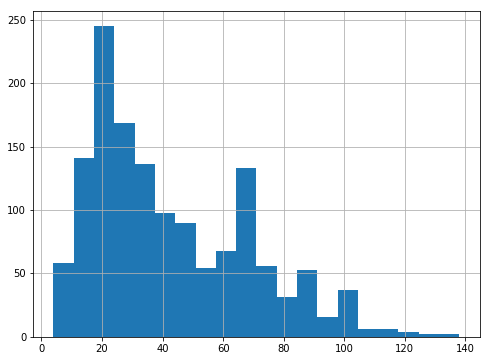

In [32]:
df.IBUs.hist(bins=20, figsize = (8,6))

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [33]:
df[df.IBUs > 75]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
68,Csar,Tin Man Brewing Company,"Evansville, IN",Russian Imperial Stout,16 oz.,12.0,90.0
79,The Gadget,Four Fathers Brewing,"Valparaiso, IN",American IPA,16 oz.,6.4,90.0
89,Gone A-Rye,Cedar Creek Brewery,"Seven Points, TX",American Double / Imperial IPA,16 oz.,8.5,90.0
93,Heavy Lifting,Boulevard Brewing Company,"Kansas City, MO",American IPA,12 oz.,6.2,80.0
110,Jah Mon,Rivertowne Brewing Company,"Export, PA",American IPA,12 oz.,5.0,100.0


## List all of the beers with IBUs below the 25th percentile

In [34]:
df[df.IBUs < 25]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
26,Jucundus,Mike Hess Brewing Company,"San Diego, CA",Wheat Ale,16 oz.,6.0,24.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

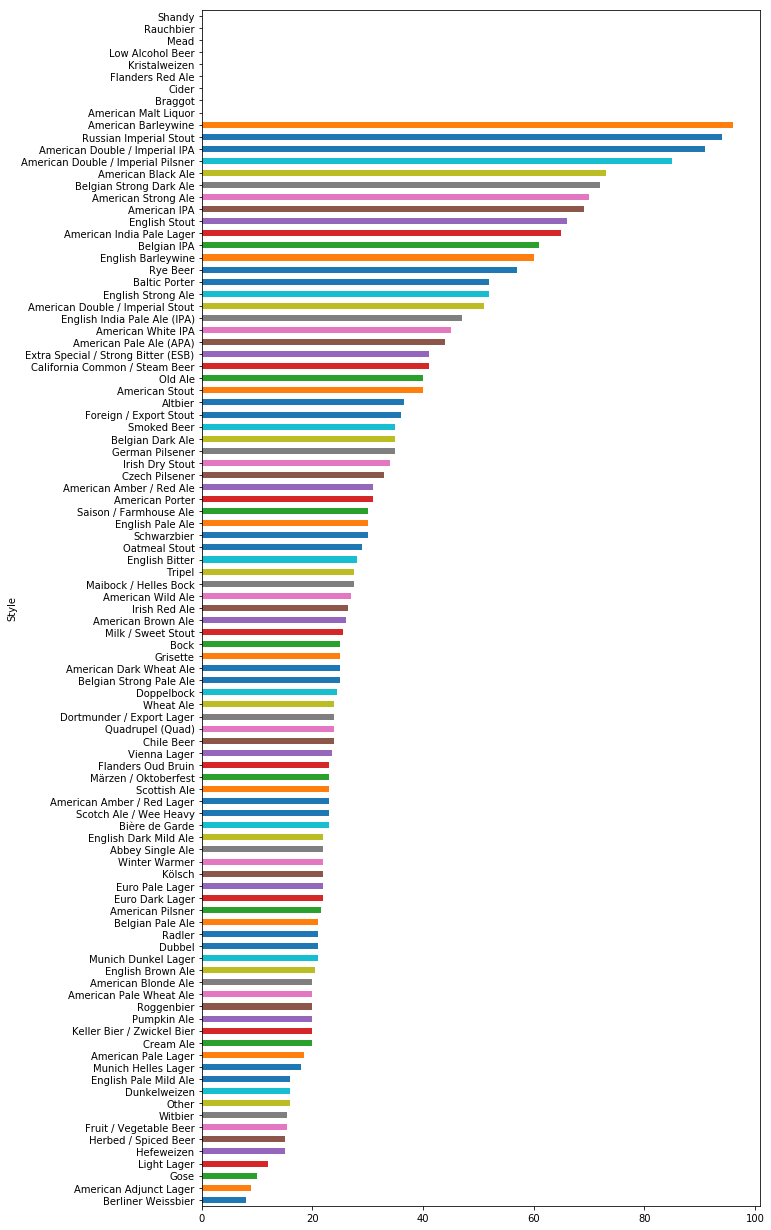

In [35]:
df.groupby('Style').IBUs.median().sort_values(ascending=True, na_position='last').plot(kind='barh', figsize=(10,22))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [36]:
high_IBU = df[df.IBUs > 75]
high_IBU.Style.value_counts().head(5)

American IPA                      66
American Double / Imperial IPA    66
American Black Ale                 9
Russian Imperial Stout             5
American Amber / Red Ale           4
Name: Style, dtype: int64

In [37]:
low_IBU = df[df.IBUs < 25]
low_IBU.Style.value_counts().head(5)

American Pale Wheat Ale     49
American Blonde Ale         46
Fruit / Vegetable Beer      30
American Amber / Red Ale    24
Witbier                     22
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [38]:
wheat_beers = df[(df.Style == 'Witbier') | (df.Style == 'Hefeweizen') | (df.Style == 'American Pale Wheat Ale')]
wheat_beers.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

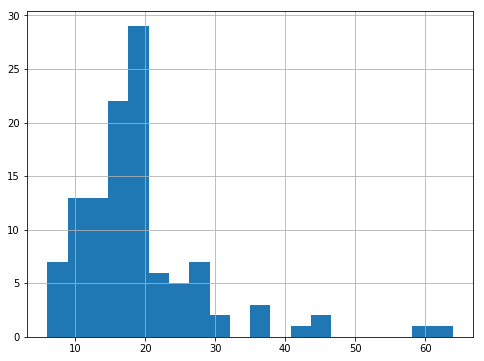

In [39]:
wheat_beers.IBUs.hist(bins=20, figsize=(8,6))

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [42]:
IPAbeer = df[df.Style.str.contains("IP.*A", na=False)]
IPAbeer
IPAbeer.IBUs.mean()

71.94897959183673

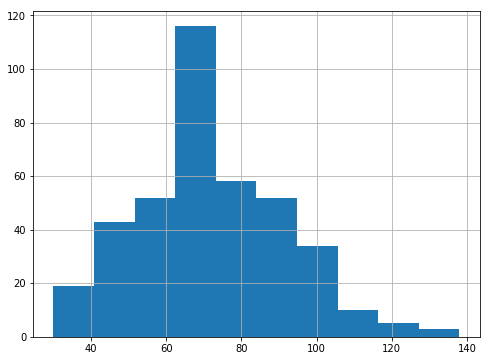

In [43]:
IPAbeer.IBUs.hist(figsize=(8,6))

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

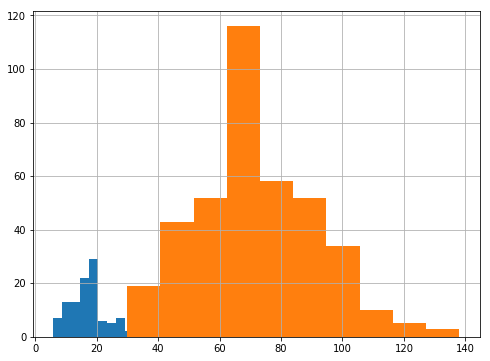

In [44]:
ax = wheat_beers.IBUs.hist(bins=20, figsize=(8,6))
IPAbeer.IBUs.hist(ax=ax, figsize=(8,6))

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [45]:
wheat_beers.ABV.mean()

5.043715846994536

In [47]:
IPAbeer.ABV.mean()

6.879285714285714

## Good work!

If you made it this far you deserve a drink.